# Load datasets

## Library

In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt') 
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2.12.0


## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data train 
with open("/content/drive/MyDrive/capstone/datasets/train.json", "r") as data_train:
  data_train = json.load(data_train)

# load data validation
with open("/content/drive/MyDrive/capstone/datasets/validation_old.json", "r") as data_validation:
  data_validation = json.load(data_validation)

In [4]:
def labelling(json_data):
    keywords, themes, recommendation = [], [], []
    themes_label = {}

    for news in json_data['berita']:
        for keyword in news['keywords']:
            keywords.append(keyword)
            themes.append(news['tema_berita'])
            recommendation.append(news['recommendation'])

        for tema in news['tema_berita']:
            if tema not in themes_label:
                themes_label[news['tema_berita']] = news['recommendation']

    return keywords, themes, recommendation, themes_label

In [5]:
keywords, themes, recommendation, labels_recommendation = labelling(data_train)

validation_keywords, validation_themes, recommendation, labels_recommendation = labelling(data_validation)

In [6]:
print("==== TRAIN.JSON ====")
print("keywords: ",keywords)
print("tema_berita: ",themes)
print("recommendation: ",recommendation)
print("key-value | tema_berita - recommendation: ",labels_recommendation)    
print(type(labels_recommendation))

len(keywords)

==== TRAIN.JSON ====
keywords:  ['rumah', 'hutan', 'luka', 'api', 'damkar', 'padam', 'memadamkan', 'terbakar', 'bocor', 'gas', 'ledakan', 'kebakaran', 'gedung', 'korban', 'evakuasi', 'gudang', 'luka bakar', 'pemadam', 'petugas', 'listrik', 'percikan', 'asap', 'pabrik', 'berkobar', 'sumber api', 'pembakaran', 'bakar', 'kayu', 'panas', 'suhu', 'tekanan tinggi', 'arus pendek', 'korsleting', 'bangunan', 'hangus', 'insiden', 'meninggal', 'demo', 'pohon', 'tewas', 'semburan', 'bensin', 'pertamina', 'mudah terbakar', 'penanganan', 'sesak napas', 'bangunan', 'korek', 'lokasi', 'tangki', 'kobaran', 'kios', 'cuaca', 'petir', 'kriminal', 'kejahatan', 'ancam', 'polisi', 'kantor polisi', 'polsek', 'mayat', 'tubuh', 'korban', 'jasad', 'meninggal', 'penyelidikan', 'penyidikan', 'narkoba', 'bukti', 'penganiayaan', 'tindak pidana', 'tersangka', 'kasus', 'pemerkosaan', 'seksual', 'pidana', 'sanksi', 'kecelakaan', 'polri', 'bom', 'maling', 'penipu', 'pencemaran', 'judi', 'perampok', 'kekerasan', 'penemba

162

In [7]:
print("==== VALIDATION.JSON ====")
print("Validation Keywords: ",validation_keywords)
print("Validation Themes: ",validation_themes)
print("recommendation: ",recommendation)
print("key-value | tema_berita - recommendation: ",labels_recommendation)    
len(validation_keywords)

==== VALIDATION.JSON ====
Validation Keywords:  ['kebakaran', 'api', 'dievakuasi', 'meninggal dunia', 'asap tebal', 'bbm', 'api masih berkobar', 'kebakaran hutan', 'dahsyat', 'kasus', 'kabut asap', 'pemadam kebakaran', 'padamkan kebakaran', 'lahan terbakar', 'bakar', 'hutan lindung terbakar', 'diungsikan', 'korban', 'migas', 'pembakaran hutan', 'korslet listrik', 'sumber api', 'mall kebakar', 'polusi udara', 'kebakaran gedung', 'kebakaran rumah', 'detektor asap', 'tabung pemadam', 'penyebab kebakaran', 'kerugian akibat kebakaran', 'pencegahan kebakaran', 'evakuasi darurat', 'zona bahaya', 'bahan mudah terbakar', 'kerusakan', 'konsleting listrik', 'detektor', 'pemulihan', 'pemadaman', 'tanggap', 'kewaspadaan', 'bencana', 'titik api', 'kebocoran gas', 'api menjalar', 'penyuluhan kebakaran', 'deteksi api', 'latihan evakuasi kebakaran', 'peringatan', 'protokol', 'pemantauan', 'tanggap darurat', 'analisis risiko kebakaran', 'penyelamatan korban kebakaran', 'korsleting listrik', 'kelalaian',

168

In [8]:
#@title old labelling
# # train.json
# keywords, themes, recommendation = [], [], []
# labels_recommendation = {}

# for berita in data_train['berita']:
#   for keyword in berita['keywords']:
#     keywords.append(keyword)
#     if  berita['tema_berita'] not in themes:
#       themes.append(berita['tema_berita'])
#       recommendation.append(berita['recommendation'])
  
#   for rekomendasi in berita['recommendation']:
#     labels_recommendation[berita['tema_berita']] = berita['recommendation']


# # validation.json
# validation_keywords, validation_themes, recommendation = [], [], []
# labels_recommendation = {}

# for berita in data_validation['berita']:
#   for keyword in berita['keywords']:
#     validation_keywords.append(keyword)
#     if  berita['tema_berita'] not in validation_themes:
#       validation_themes.append(berita['tema_berita'])
#       recommendation.append(berita['recommendation'])
  
#   for rekomendasi in berita['recommendation']:
#     labels_recommendation[berita['tema_berita']] = berita['recommendation']

In [9]:
#@title old validation
# validation.json
# valid_keywords, valid_themes = [],[]
# labels = []
# labels_recommendation = {}

# for berita in data_valid['berita']:
#   labels.append(berita['tema_berita'])
#   labels_recommendation[berita['tema_berita']] = [] # dict
  
#   for keyword in berita['keywords']:
#     valid_keywords.append(keyword)
#     valid_themes.append(berita['tema_berita'])
  
#   for rekomendasi in berita['recommendation']:
#     labels_recommendation[berita['tema_berita']].append(rekomendasi)

# Tokenize

In [10]:
# Tokenize
trunc_type='post'
padding_type='post'
tokenizer = Tokenizer()

def preprocess_text(train_data, val_data):
  all_keywords = train_data + val_data 
  tokenizer.fit_on_texts(all_keywords)

  # generate sequences 
  training_sequences = tokenizer.texts_to_sequences(train_data)
  validation_sequences = tokenizer.texts_to_sequences(val_data)

  word_index = tokenizer.word_index
  print(word_index)
  max_sequence_length = max(len(seq) for seq in training_sequences + validation_sequences)
  
  # generate pad
  padded_train_sequences = pad_sequences(training_sequences, maxlen=max_sequence_length )
  padded_val_sequences = pad_sequences(validation_sequences, maxlen=max_sequence_length)
  return padded_train_sequences, padded_val_sequences, word_index, max_sequence_length

label_mapping = {'kebakaran': 0, 'polisi': 1, 'rumah sakit': 2}
num_classes = len(label_mapping)

X_train, X_validation, word_index, max_sequence_length = preprocess_text(keywords, validation_keywords)

y_train = tf.keras.utils.to_categorical([label_mapping[label] for label in themes[:len(X_train)]], num_classes=num_classes)
y_validation = tf.keras.utils.to_categorical([label_mapping[label] for label in validation_themes[:len(X_validation)]], num_classes=num_classes)

{'kebakaran': 1, 'kesehatan': 2, 'api': 3, 'darurat': 4, 'terbakar': 5, 'korban': 6, 'rumah': 7, 'hutan': 8, 'listrik': 9, 'asap': 10, 'meninggal': 11, 'kekerasan': 12, 'pemalsuan': 13, 'mental': 14, 'evakuasi': 15, 'bakar': 16, 'pemadam': 17, 'tekanan': 18, 'polisi': 19, 'narkoba': 20, 'pencurian': 21, 'penyakit': 22, 'rawat': 23, 'pelayanan': 24, 'medis': 25, 'luka': 26, 'gas': 27, 'gedung': 28, 'petugas': 29, 'berkobar': 30, 'sumber': 31, 'pembakaran': 32, 'korsleting': 33, 'bangunan': 34, 'mudah': 35, 'korek': 36, 'cuaca': 37, 'kejahatan': 38, 'mayat': 39, 'pidana': 40, 'kasus': 41, 'seksual': 42, 'perampok': 43, 'keamanan': 44, 'pelanggaran': 45, 'penculikan': 46, 'identitas': 47, 'sakit': 48, 'ambulans': 49, 'who': 50, 'risiko': 51, 'tenaga': 52, 'pemicu': 53, 'darah': 54, 'kanker': 55, 'pencegahan': 56, 'detektor': 57, 'tanggap': 58, 'protokol': 59, 'pemantauan': 60, 'rekam': 61, 'uang': 62, 'pemerasan': 63, 'penggelapan': 64, 'pencabulan': 65, 'undang': 66, 'inap': 67, 'pasien'

In [11]:
print(len(X_train))
print(len(y_train))

162
162


In [12]:
word_index

{'kebakaran': 1,
 'kesehatan': 2,
 'api': 3,
 'darurat': 4,
 'terbakar': 5,
 'korban': 6,
 'rumah': 7,
 'hutan': 8,
 'listrik': 9,
 'asap': 10,
 'meninggal': 11,
 'kekerasan': 12,
 'pemalsuan': 13,
 'mental': 14,
 'evakuasi': 15,
 'bakar': 16,
 'pemadam': 17,
 'tekanan': 18,
 'polisi': 19,
 'narkoba': 20,
 'pencurian': 21,
 'penyakit': 22,
 'rawat': 23,
 'pelayanan': 24,
 'medis': 25,
 'luka': 26,
 'gas': 27,
 'gedung': 28,
 'petugas': 29,
 'berkobar': 30,
 'sumber': 31,
 'pembakaran': 32,
 'korsleting': 33,
 'bangunan': 34,
 'mudah': 35,
 'korek': 36,
 'cuaca': 37,
 'kejahatan': 38,
 'mayat': 39,
 'pidana': 40,
 'kasus': 41,
 'seksual': 42,
 'perampok': 43,
 'keamanan': 44,
 'pelanggaran': 45,
 'penculikan': 46,
 'identitas': 47,
 'sakit': 48,
 'ambulans': 49,
 'who': 50,
 'risiko': 51,
 'tenaga': 52,
 'pemicu': 53,
 'darah': 54,
 'kanker': 55,
 'pencegahan': 56,
 'detektor': 57,
 'tanggap': 58,
 'protokol': 59,
 'pemantauan': 60,
 'rekam': 61,
 'uang': 62,
 'pemerasan': 63,
 'penggel

# Model Build and Compile

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(len(word_index)+1,  100, input_length=max_sequence_length),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(num_classes, activation='softmax') #output
# ])

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1,  100, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(96),
    #tf.keras.layers.Dense(num_classes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(num_classes, activation='softmax') #output
])

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_validation, y_validation))

Epoch 1/20
11/11 [==============================] - 8s 232ms/step - loss: 1.1016 - accuracy: 0.2963 - val_loss: 1.0975 - val_accuracy: 0.4643
Epoch 2/20
11/11 [==============================] - 1s 56ms/step - loss: 1.0966 - accuracy: 0.3457 - val_loss: 1.0959 - val_accuracy: 0.3512
Epoch 3/20
11/11 [==============================] - 1s 55ms/step - loss: 1.0922 - accuracy: 0.3827 - val_loss: 1.0897 - val_accuracy: 0.4286
Epoch 4/20
11/11 [==============================] - 1s 47ms/step - loss: 1.0686 - accuracy: 0.6975 - val_loss: 1.0617 - val_accuracy: 0.5893
Epoch 5/20
11/11 [==============================] - 0s 29ms/step - loss: 0.9365 - accuracy: 0.9383 - val_loss: 0.8900 - val_accuracy: 0.5536
Epoch 6/20
11/11 [==============================] - 0s 31ms/step - loss: 0.4108 - accuracy: 0.9506 - val_loss: 0.9139 - val_accuracy: 0.6548
Epoch 7/20
11/11 [==============================] - 0s 29ms/step - loss: 0.1497 - accuracy: 0.9568 - val_loss: 1.0821 - val_accuracy: 0.6310
Epoch 8/20
1

In [68]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 4, 100)            29900     
                                                                 
 bidirectional_11 (Bidirecti  (None, 4, 256)           234496    
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_24 (LSTM)              (None, 96)                135552    
                                                                 
 dropout_22 (Dropout)        (None, 96)                0         
                                                                 
 dense_21 (Dense)            (None, 3)                 291       
                                                     

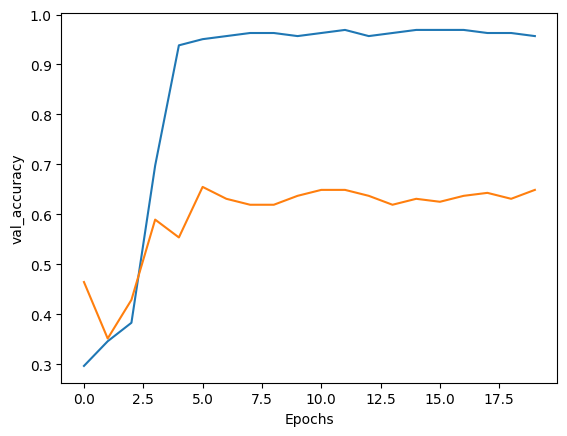

In [69]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  #plt.plot(history.history[f'val_{metric}'])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  #plt.legend([metric, f'val{metric}'])
  plt.show

plot_graphs(history, "accuracy")
plot_graphs(history, "val_accuracy")

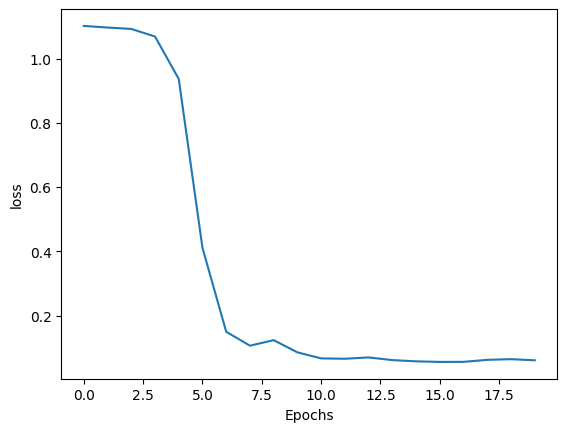

In [70]:
plot_graphs(history, "loss")

# Model Evaluation

## Load Title Articles

In [71]:
dt_kebakaran = pd.read_csv("/content/drive/MyDrive/capstone/data_testing/Kebakaran.csv")
dt_kebakaran['Label'] = "Kebakaran"
dt_kebakaran.head(5)

,Judul Berita,Link Berita,Link Gambar,Label
0,"Jenuh Mondok, 3 Santri Bakar Asrama Tahfiz Al-...",https://www.cnnindonesia.com/nasional/20230525...,https://akcdn.detik.net.id/visual/2020/01/01/7...,Kebakaran
1,VIDEO: Detik-detik Gedung Runtuh usai Dilahap ...,https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2023/05/25/t...,Kebakaran
2,"Kemhan Rusia Dilaporkan Kebakaran, Moskow Buka...",https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2023/05/04/i...,Kebakaran
3,"Kebakaran di Lantai 7 Asrama Polri Jakpus, Tak...",https://www.cnnindonesia.com/nasional/20230523...,https://akcdn.detik.net.id/visual/2020/01/01/2...,Kebakaran
4,20 Orang Tewas dalam Kebakaran Asrama Sekolah ...,https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2021/07/19/i...,Kebakaran


In [72]:
dt_kejahatan = pd.read_csv("/content/drive/MyDrive/capstone/data_testing/Kejahatan.csv")
dt_kejahatan['Label'] = "Polisi"
dt_kesehatan = pd.read_csv("/content/drive/MyDrive/capstone/data_testing/kesehatan.csv")
dt_kesehatan['Label'] = "Rumah Sakit"

dt_kebakaran = dt_kebakaran[['Judul Berita','Label']]
dt_kejahatan = dt_kejahatan[['Judul Berita','Label']]
dt_kesehatan = dt_kesehatan[['Judul Berita','Label']]

In [73]:
all_titles = pd.concat([dt_kebakaran, dt_kejahatan, dt_kesehatan], axis=0)

In [74]:
all_titles

,Judul Berita,Label
0,"Jenuh Mondok, 3 Santri Bakar Asrama Tahfiz Al-...",Kebakaran
1,VIDEO: Detik-detik Gedung Runtuh usai Dilahap ...,Kebakaran
2,"Kemhan Rusia Dilaporkan Kebakaran, Moskow Buka...",Kebakaran
3,"Kebakaran di Lantai 7 Asrama Polri Jakpus, Tak...",Kebakaran
4,20 Orang Tewas dalam Kebakaran Asrama Sekolah ...,Kebakaran
...,...,...
45,Kenali Faktor Risiko Penyebab Sifilis pada Lak...,Rumah Sakit
46,Doa setelah Membaca Surat Al Kahfi Lengkap Lat...,Rumah Sakit
47,"90 Persen Hepatitis B Ditularkan Ibu ke Anak, ...",Rumah Sakit
48,Kemenkes Mau Pangan Lokal Gantikan Biskuit Bal...,Rumah Sakit


In [75]:
print(all_titles['Label'].value_counts())
print(type(all_titles['Judul Berita']))

Kebakaran      50
Rumah Sakit    50
Polisi         48
Name: Label, dtype: int64
<class 'pandas.core.series.Series'>


## Pre-process titles

In [76]:
def clean_titles(titles):
    clean = []
    stopwords_id = stopwords.words('indonesian')
    
    for title in titles:
        title = title.lower()
        title = re.sub(r'\d+', '', title)  
        title = re.sub(r'[^\w\s]', '', title) 
        
        words = title.split()
        clean_words = [word for word in words if word not in stopwords_id]
        clean_words = ' '.join(clean_words)
        clean.append(clean_words)
        cleaned_titles = ' '.join([str(word) for word in clean])  
    
    return cleaned_titles

## Test titles

In [94]:
sample = all_titles['Judul Berita'].sample(10)
label_counts = all_titles.loc[all_titles['Judul Berita'].isin(sample), 'Label'].value_counts()
label_counts

Polisi         6
Rumah Sakit    3
Kebakaran      2
Name: Label, dtype: int64

In [95]:
testing = clean_titles(sample)
testing

'doa mengusir setan terhindar kejahatan penyebab motor matic distarter jenazah pelaku pembakar istri anak ditolak warga diduga kdrt bukhori yusuf berencana laporkan mantan istri asrama polisi manado kebakaran korban jiwa bocah sd sukabumi tewas diduga dianiaya teman sekolah gudang makanan makassar terbakar diduga arus pendek marak gangster kapolda metro datangi lokasi rawan kejahatan angka kriminalitas polri fokus kejahatan polisi cengkareng ringkus geng motor maju kena mundur kena'

In [96]:
test_sequence = tokenizer.texts_to_sequences([testing])
padded_test_sequence = pad_sequences(test_sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_test_sequence)[0]

recommended_hobby_index = tf.argmax(prediction).numpy()
recommended_hobby = [label for label, index in label_mapping.items() if index == recommended_hobby_index][0]

print("Rekomendasi: " + recommended_hobby)

1/1 [==============================] - 0s 28ms/step
Rekomendasi: polisi


# Convert to TFLite

## Saved to h5 format

In [ ]:
# export_dir = '/content/drive/MyDrive/capstone/'

# # Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
# model.save("my_h5_model.h5")

# # It can be used to reconstruct the model identically.
# #reconstructed_model = tf.keras.models.load_model("my_h5_model.h5")

# tf.saved_model.save(model, export_dir)

## Generate saved model and convert

In [ ]:
# # generate saved model
# export_dir = '/content/drive/MyDrive/capstone/saved_model/1'
# tf.saved_model.save(model, export_dir)

In [ ]:
# # convert model to TFLite
# converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
# converter.target_spec.supported_ops = [
#   tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
#   tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
# ]
# tflite_model = converter.convert()

In [ ]:
# with open('/content/drive/MyDrive/capstone/' + 'model.tflite', 'wb') as f:
#   f.write(tflite_model)